#**Criando gráficos de comparação**

##**Carregando os dados**

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/python_dados/refs/heads/main/Dados/loja_vendas.csv')

In [4]:
df.head()

,ID_compra,unidade,cidade,data,horario,categoria_produto,valor_unitario,quantidade,valor_total,metodo_pagamento,ID_cliente,programa_cashback,idade,avaliacao_compra
0,6,Parque das nações,Santo André,2022-01-03,15:40,Eletrônicos,4457.9,4,17831.6,Dinheiro,6149,Sim,30,10
1,5,Oswaldo Cruz,São Caetano do Sul,2022-01-03,16:48,Ferramentas e construção,115.9,1,115.9,PIX,9491,Sim,36,9
2,9,Paulicéia,São Bernardo do Campo,2022-01-03,12:08,Beleza e cuidados pessoais,68.9,2,137.8,Cartão,5288,Não,39,9
3,4,Oswaldo Cruz,São Caetano do Sul,2022-01-03,9:29,Ferramentas e construção,80.9,5,404.5,PIX,9679,Sim,35,10
4,8,Parque das nações,Santo André,2022-01-03,13:02,Beleza e cuidados pessoais,165.0,4,660.0,PIX,1380,Não,50,9


Neste conjunto de dados, temos informações de uma loja de departamentos, incluindo registros das compras realizadas pelos clientes. Os dados abrangem variáveis numéricas, categóricas e as datas e horários das compras.

Podemos **realizar comparações** nesses dados para **identificar semelhanças, diferenças e padrões**.

Para começar, vamos analisar **qual unidade dessa rede de departamentos obteve o maior valor total de vendas**. Um **gráfico de colunas** é ideal para esta tarefa, pois permite visualizar facilmente as diferenças entre as categorias, destacando qual unidade tive o melhor desempenho.

Para criar esse gráfico, utilizaremos a [biblioteca Seaborn](https://seaborn.pydata.org/index.html), que é uma ferramenta poderosa e intuitiva para criar visualizações de dados:

In [5]:
import seaborn as sns

##**Gráfico de colunas**

Para construir o gráficos de colunas, utilizaremos a função [`sns.barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html):

> 👩‍💻***Dica da Val:*** Usar `reset_index()` após um agrupamento com `groupby()` facilita o acesso às colunas, transformando o índice em uma sequência padrão (0, 1, 2,...) ao invés de considerar a coluna `categoria_produto` como índice, neste caso.

<Axes: xlabel='unidade', ylabel='valor_total'>

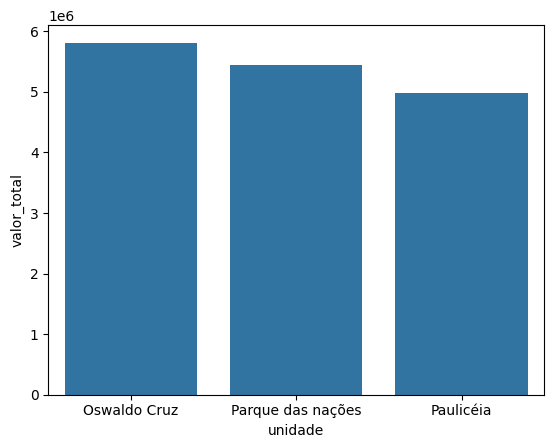

In [ ]:
# Agrupando por unidade e somando o valor total
df_unidade = df.groupby('unidade')['valor_total'].sum().reset_index()

# Criando o gráfico de colunas
sns.barplot(x='unidade', y='valor_total', data=df_unidade)

Também podemos **comparar a frequência de diferentes categorias** presentes nos dados. Por exemplo, para analisar quais métodos de pagamento foram mais utilizados nas compras, podemos usar a função [`sns.countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) da biblioteca Seaborn.

Essa função conta automaticamente a frequência de cada categoria em uma variável:

<Axes: xlabel='metodo_pagamento', ylabel='count'>

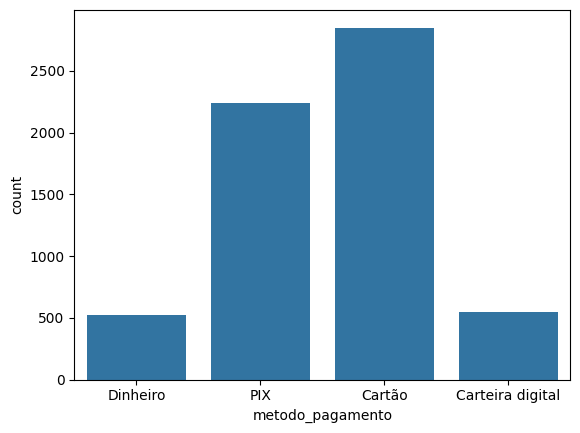

In [ ]:
# Criando o gráfico de contagem
sns.countplot(x='metodo_pagamento', data=df)

Só que, por padrão, o gráfico exibe as categorias na ordem em que aparecem no DataFrame. No entanto, essa disposição pode dificultar a análise e a comparação dos resultados. Para **tornar a visualização mais informativa e facilitar a interpretação**, o ideal é **ordenar as colunas de acordo com os valores**, como do maior para o menor. Isso ajuda a destacar as categorias mais relevantes e a criar uma análise mais clara e impactante.

Ordenando as categorias:

In [ ]:
# Ordenando os dados da maior contagem para menor
metodo_pagamento_contagem = df['metodo_pagamento'].value_counts()
metodo_pagamento_contagem

,count
metodo_pagamento,
Cartão,2851
PIX,2244
Carteira digital,547
Dinheiro,527


<Axes: xlabel='metodo_pagamento', ylabel='count'>

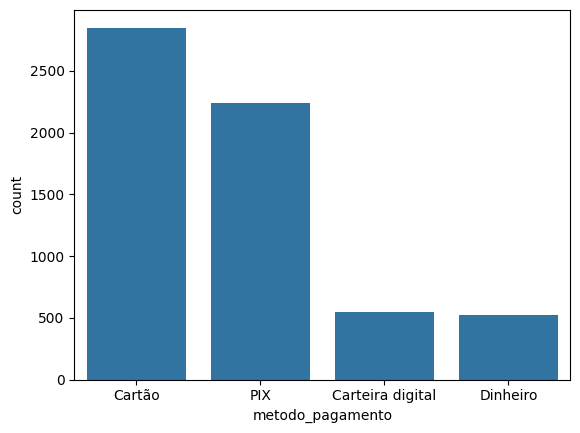

In [ ]:
# Criando o gráfico de contagem ordenado
sns.countplot(x='metodo_pagamento', data=df, order=metodo_pagamento_contagem.index)

E se quisermos **comparar diferentes categorias em relação a uma variável específica**?

Já sabemos a frequência dos métodos de pagamento, mas será que esses métodos variam entre as diferentes unidades da loja de departamentos?

É nesse caso que o **gráfico de colunas agrupadas** se torna útil. Ele permite comparar as categorias (como os métodos de pagamento) para cada unidade da loja, facilitando a visualização das variações e padrões entre elas.

Com esse gráfico, podemos observar claramente as diferenças nas preferências de pagamento de cada unidade, oferecendo uma análise mais detalhada e informativa.



##**Gráfico de colunas agrupadas**

Para fazer isso no Seaborn, é bem simples! Basta adicionar o parâmetro `hue` e especificar a variável que queremos usar para agrupar/comparar. O `hue` permite separar os dados de acordo com essa variável, diferenciando as categorias com cores distintas no gráfico.

Isso torna a visualização ainda mais clara e facilita a comparação entre as diferentes variáveis:

<Axes: xlabel='metodo_pagamento', ylabel='count'>

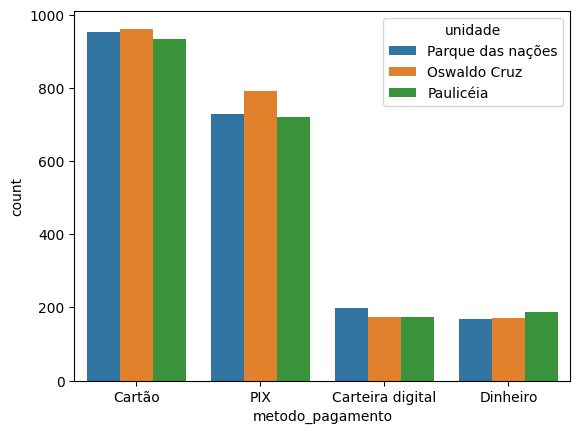

In [ ]:
# Criando o gráfico de contagem com hue
sns.countplot(x='metodo_pagamento', data=df, order=metodo_pagamento_contagem.index, hue='unidade')

> 👩‍💻***Dica da Val:*** Por padrão, ao definir o `hue`, o Seaborn escolhe automaticamente as cores para diferenciar as categorias. No entanto, você pode personalizar essas cores de acordo com as suas preferências, utilizando listas de cores específicas ou [paletas pré-definidas do Seaborn](https://seaborn.pydata.org/tutorial/color_palettes.html). Isso permite ajustar a aparência do gráfico para torná-lo mais adequado à sua análise ou à estética desejada.

<Axes: xlabel='metodo_pagamento', ylabel='count'>

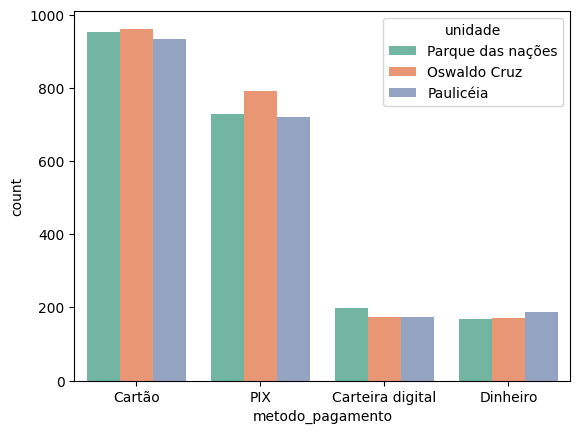

In [ ]:
# Definindo uma paleta de cores
sns.countplot(x='metodo_pagamento', data=df, order=metodo_pagamento_contagem.index, hue='unidade', palette='Set2')

##**Gráfico de Barras**

Até agora, trabalhamos com poucas categorias para as comparações. Mas e quando lidamos com **várias categorias**? Qual será o gráfico mais adequado para analisar essas comparações de forma clara?

Agora, vamos explorar as categorias de produtos vendidos e calcular o total de unidades vendidas em cada categoria. Para isso, precisaremos de um gráfico que nos ajude a comparar eficientemente um grande número de categorias.

Se criarmos um gráfico de colunas, o resultado ficará assim:

<Axes: xlabel='categoria_produto', ylabel='quantidade'>

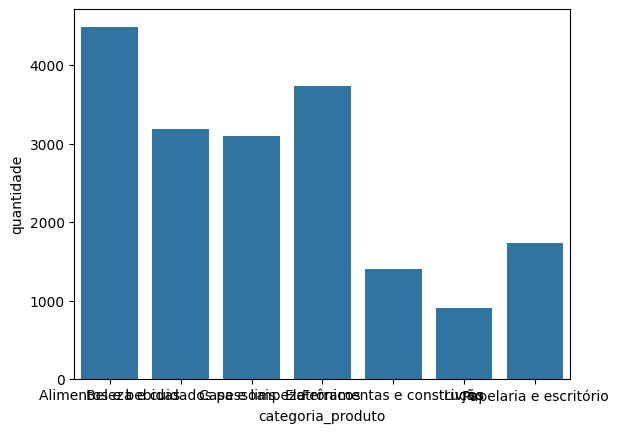

In [ ]:
# Agrupando por categoria e somando a quantidade
soma_categorias_produtos = df.groupby('categoria_produto')['quantidade'].sum().reset_index()

# Criando o gráfico de colunas
sns.barplot(x='categoria_produto', y='quantidade', data=soma_categorias_produtos)

Quando temos muitas categorias, os nomes delas podem acabar ficando sobrepostos, o que dificulta a leitura. Para resolver esse problema, podemos **alterar a orientação do gráfico**, transformando-o em um **gráfico de barras** horizontais. Isso proporciona mais espaço para exibir os rótulos de forma clara e melhora a visualização, especialmente quando lidamos com muitas categorias.

Para isso, basta ajustar os parâmetros da função barplot, invertendo o eixo x pelo y e o y pelo x:

<Axes: xlabel='quantidade', ylabel='categoria_produto'>

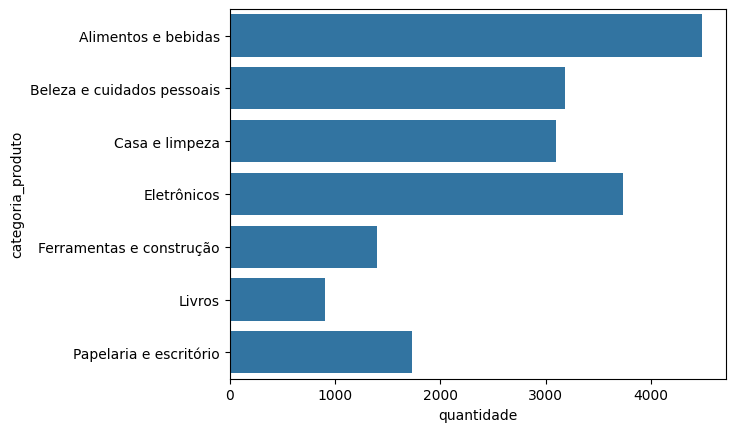

In [ ]:
# Criando o gráfico de barra
sns.barplot(y='categoria_produto', x='quantidade', data=soma_categorias_produtos)

Para melhorar a visualização, podemos fazer a **ordenação**, deixando a comparação mais intuitiva:

<Axes: xlabel='quantidade', ylabel='categoria_produto'>

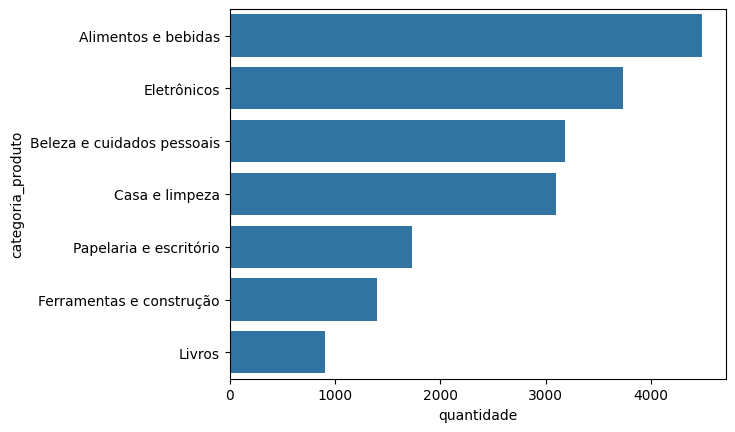

In [ ]:
# Ordenando os dados da maior quantidade para menor
soma_categorias_produtos_ordenado = soma_categorias_produtos.sort_values(by=['quantidade'], ascending=False)

# Criando o gráfico de barra ordenado
sns.barplot(y='categoria_produto', x='quantidade', data=soma_categorias_produtos_ordenado)

##**Gráfico de linhas**

Por fim, para concluir nossa análise de gráficos de comparação, vamos explorar os **dados relacionados ao tempo**, ou seja, as séries temporais.

Suponha que queiramos analisar o valor total das vendas de cada dia ao longo do período presente no nosso conjunto de dados, com base na coluna data.

O primeiro passo para realizar essa análise é **converter a coluna de data para o formato [datetime](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html)**. Isso nos permitirá trabalhar com ela de maneira mais eficaz, facilitando a manipulação e análise dos dados ao longo do tempo:

In [ ]:
# Transformando a coluna data em datetime
df['data'] = pd.to_datetime(df['data'], format='%Y-%m-%d')

Agora, vamos obter o valor total para cada dia e depois podemos exibir um gráfico de linhas com a função [sns.lineplot()](https://seaborn.pydata.org/generated/seaborn.lineplot.html), ideal para representar as tendências ao longo do tempo, ou de acordo com uma sequência que possui ordenação:

<Axes: xlabel='data', ylabel='valor_total'>

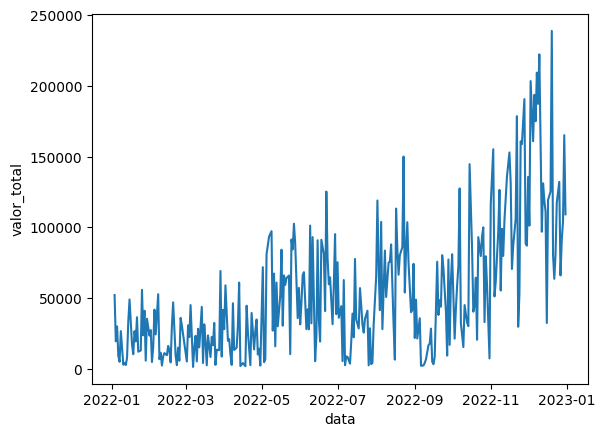

In [ ]:
# Agrupando por data e somando o valor total
vendas_diarias = df.groupby('data')['valor_total'].sum().reset_index()

# Criando o gráfico de linhas
sns.lineplot(x='data', y='valor_total', data=vendas_diarias)

Por fim, é possível realizar **customizações básicas** em todos os gráficos utilizando o [módulo pyplot da biblioteca matplotlib](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html). Você pode, por exemplo, ajustar o tamanho do gráfico, adicionar título e rótulos aos eixos, modificar o tamanho das fontes, aplicar o método `despine()` da seaborn para remover bordas, e usar o comando `plt.show()` para exibir apenas o gráfico:

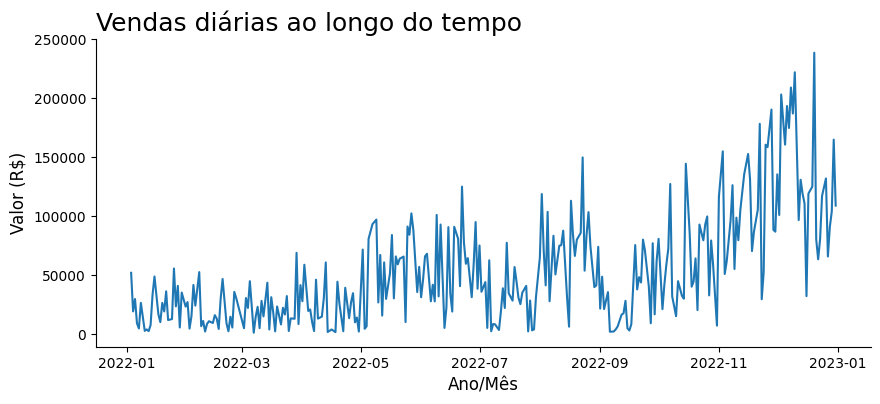

In [ ]:
import matplotlib.pyplot as plt

# Definindo o tamanho da figura
plt.figure(figsize=(10, 4))

# Plotando o gráfico
sns.lineplot(x='data', y='valor_total', data=vendas_diarias)

# Definindo o título do gráfico
plt.title('Vendas diárias ao longo do tempo', loc='left', fontsize=18)

# Definindo a label do eixo x
plt.xlabel('Ano/Mês', fontsize=12)

# Definindo a label do eixo y
plt.ylabel('Valor (R$)', fontsize=12)

# Removendo a borda do gráfico
sns.despine()

# Exibindo o gráfico
plt.show()